In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

In [2]:
df = pd.read_csv("titanic-passengers.csv",delimiter =";")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [4]:
df['Age'].fillna(df['Age'].mean(), inplace=True)
if 'Cabin' in df.columns: 
    df.drop('Cabin', axis=1, inplace=True)

In [5]:
df.dropna(subset=["Embarked"], inplace=True)

In [6]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder
Embarked_le = LabelEncoder()
df["Embarked"] = Embarked_le.fit_transform(df["Embarked"])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,2
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,2
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,2
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,2
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,2


In [8]:
df["Survived"]=df["Survived"].map({"Yes": 1, "No": 0})
df["Sex"]=df["Sex"].map({"male": 1, "female": 0})
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.000000,0,0,248740,13.0000,2
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.000000,0,0,348123,7.6500,2
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.000000,0,0,350050,7.8542,2
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.000000,0,4,349909,21.0750,2
4,672,0,1,"Davidson, Mr. Thornton",1,31.000000,1,0,F.C. 12750,52.0000,2
...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.000000,1,0,237736,30.0708,0
887,61,0,3,"Sirayanian, Mr. Orsen",1,22.000000,0,0,2669,7.2292,0
888,535,0,3,"Cacic, Miss. Marija",0,30.000000,0,0,315084,8.6625,2
889,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",1,29.699118,0,0,349215,7.8958,2


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


x = df[['Pclass', 'PassengerId','Sex', 'Age', 'Embarked', 'SibSp', 'Parch']]
y = df['Survived']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

logreg = LogisticRegression() 
logreg.fit(x_train, y_train)  
y_pred  = logreg.predict(x_test) 
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))
print("Roc Auc score :", roc_auc_score(y_test, y_pred))

Accuracy=0.81
Roc Auc score : 0.7867934136818876


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<AxesSubplot:xlabel='Sex', ylabel='Survived'>

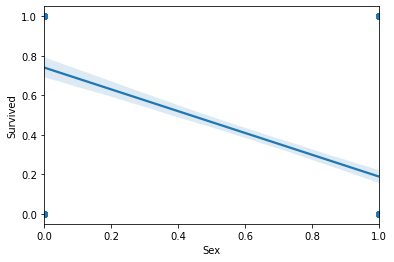

In [10]:
import seaborn as sns
sns.regplot(x='Sex',y='Survived',data=df)

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

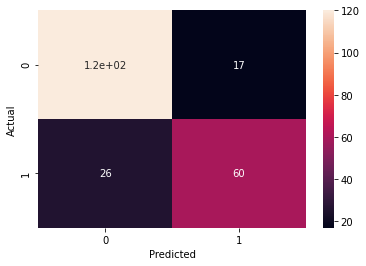

In [11]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [12]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       137
           1       0.78      0.70      0.74        86

    accuracy                           0.81       223
   macro avg       0.80      0.79      0.79       223
weighted avg       0.81      0.81      0.80       223



In [13]:
#ROC curves typically feature true positive rate on the Y axis, and false positive rate on the X axis. 
#This means that the top left corner of the plot is the “ideal” point - a false positive rate of zero, 
#and a true positive rate of one. This is not very realistic,
#but it does mean that a larger area under the curve (AUC) is usually better.